<a href="https://colab.research.google.com/github/freaksie/Neural-Networks/blob/master/Google_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

    Date        :
    Open        :
    High        :
    Low         :
    Close       :
    Volume      :
    Ex-Dividend :
    Split Ratio :

Objective of this Analysis:

    To understand how the stock market's performance is affected.

### Table of Contents

* [Importing All required packages](#Importing_All_required_packages)
* [View Database](#View_Database)
* [Database Info](#Database_Info)
* [Plotting KDE and Violin Graph](#KDE_Violin)
* [Adding Year and Month Column](#Year_Month)
* [Yearly Record Count Plot](#Year_count)
* [Year against all Variables](#year_against_all)
* [Month against all Variables](#month_against_all)
* [Plotting graphs for Individual Year](#Individual_Year)
    * [2004](#2004)
    * [2005](#2005)
    * [2006](#2006)
    * [2007](#2007)
    * [2008](#2008)
    * [2009](#2009)
    * [2010](#2010)
    * [2011](#2011)
    * [2012](#2012)
    * [2013](#2013)
    * [2014](#2014)
    * [2015](#2015)
    * [2016](#2016)
    * [2017](#2017)

## **Importing All required packages**  <a class="anchor" id="Importing_All_required_packages"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from tensorflow import keras
from keras.regularizers import L1L2
%matplotlib inline


In [2]:
stock_market_dataset = pd.read_csv('../Google.csv')
stock_market_dataset.shape

Mounted at /content/drive


(3125, 13)

So, It shows us that the dataset has 3125 records/rows and 13 columns

### **Database**  <a class="anchor" id="View_Database"></a>

In [3]:
stock_market_dataset.head(3125)

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2004-08-19,100.01,104.06,95.9600,100.335,44659000,0.0,1,50.159839,52.191109,48.128568,50.322842,44659000
1,2004-08-20,101.01,109.08,100.5000,108.310,22834300,0.0,1,50.661387,54.708881,50.405597,54.322689,22834300
2,2004-08-23,110.76,113.48,109.0500,109.400,18256100,0.0,1,55.551482,56.915693,54.693835,54.869377,18256100
3,2004-08-24,111.24,111.60,103.5700,104.870,15247300,0.0,1,55.792225,55.972783,51.945350,52.597363,15247300
4,2004-08-25,104.76,108.00,103.8800,106.000,9188600,0.0,1,52.542193,54.167209,52.100830,53.164113,9188600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3120,2017-01-10,827.07,829.41,823.1400,826.010,1141799,0.0,1,827.070000,829.410000,823.140000,826.010000,1141799
3121,2017-01-11,826.62,829.90,821.4700,829.860,1261666,0.0,1,826.620000,829.900000,821.470000,829.860000,1261666
3122,2017-01-12,828.38,830.38,821.0100,829.530,1348274,0.0,1,828.380000,830.380000,821.010000,829.530000,1348274
3123,2017-01-13,831.00,834.65,829.5200,830.940,1255255,0.0,1,831.000000,834.650000,829.520000,830.940000,1255255


In [4]:
stock_market_dataset.columns.tolist()

['Date',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'Ex-Dividend',
 'Split Ratio',
 'Adj. Open',
 'Adj. High',
 'Adj. Low',
 'Adj. Close',
 'Adj. Volume']

In [5]:
print('Ex-Dividend:',stock_market_dataset['Ex-Dividend'].unique(),'\n')

print('Split Ratio:',stock_market_dataset['Split Ratio'].unique(),'\n')

print("Ex-Dividend's sum:",stock_market_dataset['Ex-Dividend'].sum(),'\n')

Ex-Dividend: [  0.        567.9716685] 

Split Ratio: [1] 

Ex-Dividend's sum: 567.9716685 



**Observations:**
* `Ex-Dividend` has only 2 unique values and all of them are zero except the one with 567.9716685.
* The column `Split Ratio` only consists of value 1.

### **Database Info**  <a class="anchor" id="Database_Info"></a>

In [6]:
stock_market_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3125 entries, 0 to 3124
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         3125 non-null   object 
 1   Open         3125 non-null   float64
 2   High         3125 non-null   float64
 3   Low          3125 non-null   float64
 4   Close        3125 non-null   float64
 5   Volume       3125 non-null   int64  
 6   Ex-Dividend  3125 non-null   float64
 7   Split Ratio  3125 non-null   int64  
 8   Adj. Open    3125 non-null   float64
 9   Adj. High    3125 non-null   float64
 10  Adj. Low     3125 non-null   float64
 11  Adj. Close   3125 non-null   float64
 12  Adj. Volume  3125 non-null   int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 317.5+ KB


As you can see there is no null value present.

In [7]:
stock_market_dataset[['Open','High','Low','Close','Volume','Ex-Dividend','Split Ratio']].describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio
count,3125.000000,3125.000000,3125.000000,3125.000000,3.125000e+03,3125.000000,3125.0
mean,560.171567,565.480031,554.309518,559.907342,8.404691e+06,0.181751,1.0
std,200.944961,201.563829,199.979903,200.813213,8.399679e+06,10.160186,0.0
min,99.090000,101.740000,95.960000,100.010000,5.211410e+05,0.000000,1.0
25%,445.250000,450.720000,438.560500,444.080000,3.209500e+06,0.000000,1.0
50%,548.490000,553.520000,543.670000,548.650000,5.620700e+06,0.000000,1.0
75%,667.490000,673.027500,659.240000,667.120000,1.107890e+07,0.000000,1.0
max,1226.800000,1228.880000,1218.600000,1220.170000,8.215110e+07,567.971668,1.0


In [8]:
stock_market_dataset[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']].describe()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,3125.000000,3125.000000,3125.000000,3125.000000,3.125000e+03
mean,354.861790,358.112859,351.231911,354.691981,8.404691e+06
std,195.252794,196.367956,193.820339,195.144724,8.399679e+06
min,49.698414,51.027517,48.128568,50.159839,5.211410e+05
25%,223.314350,226.057819,219.959243,222.727539,3.209500e+06
50%,288.992091,291.399522,286.760201,289.578902,5.620700e+06
75%,517.492450,520.810000,513.108918,517.372078,1.107890e+07
max,838.500000,839.000000,829.520000,835.740000,8.215110e+07


In [9]:
stock_market_dataset.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64

In [10]:
stock_market_dataset.dtypes

Date            object
Open           float64
High           float64
Low            float64
Close          float64
Volume           int64
Ex-Dividend    float64
Split Ratio      int64
Adj. Open      float64
Adj. High      float64
Adj. Low       float64
Adj. Close     float64
Adj. Volume      int64
dtype: object

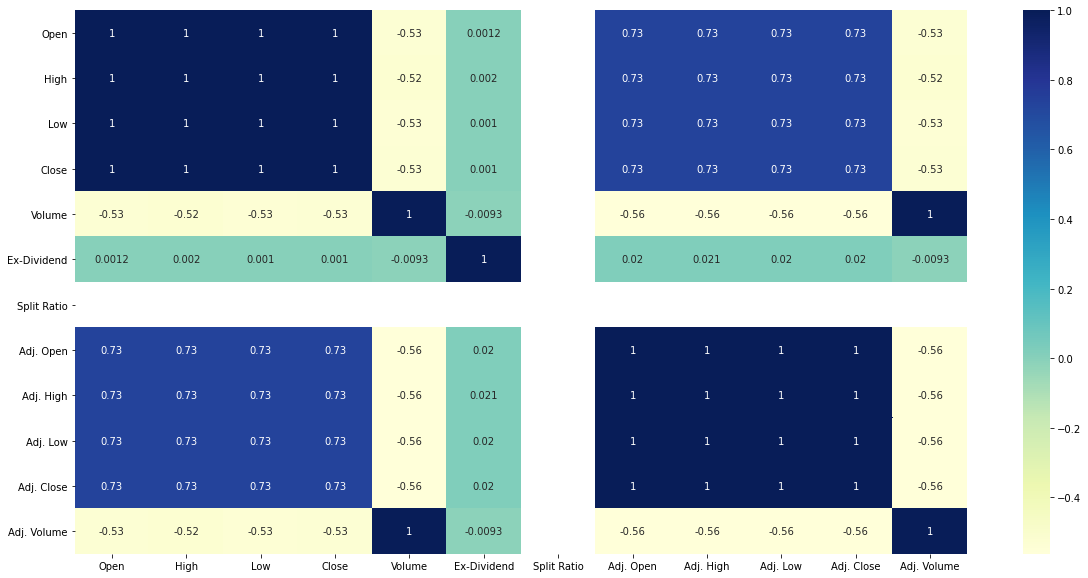

In [11]:
plt.rcParams['figure.figsize'] = (20, 10)
correlation = stock_market_dataset.corr()
correlation_leads = correlation.index
sns.heatmap(stock_market_dataset[correlation_leads].corr(),annot = True , cmap="YlGnBu")

### **KDE and Violin Graph**  <a class="anchor" id="KDE_Violin"></a>

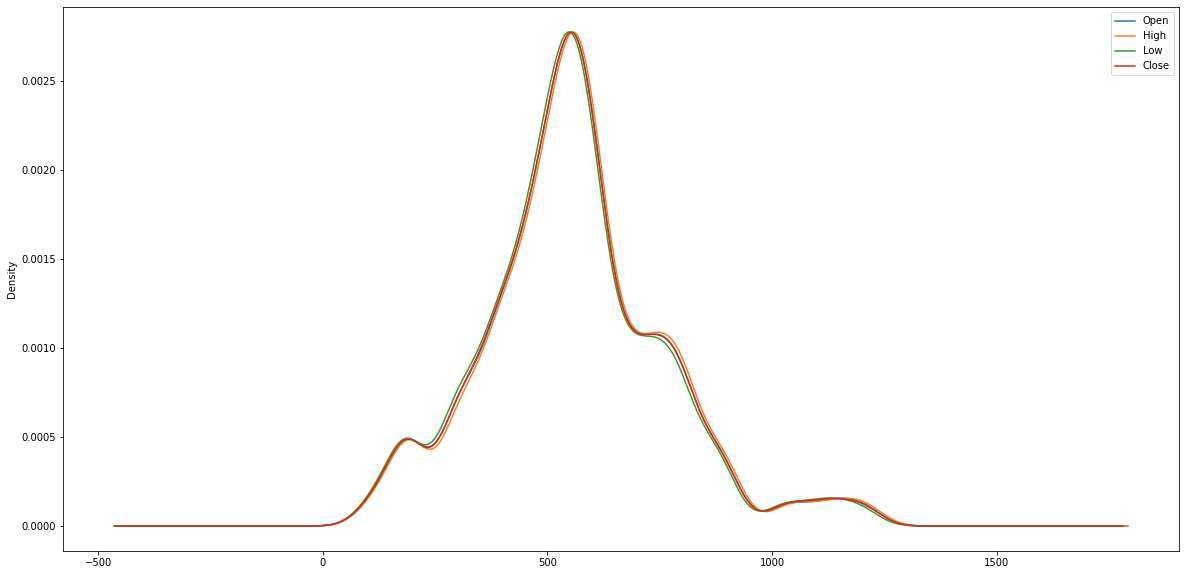

In [12]:
stock_market_dataset[['Open','High','Low','Close']].plot.density()

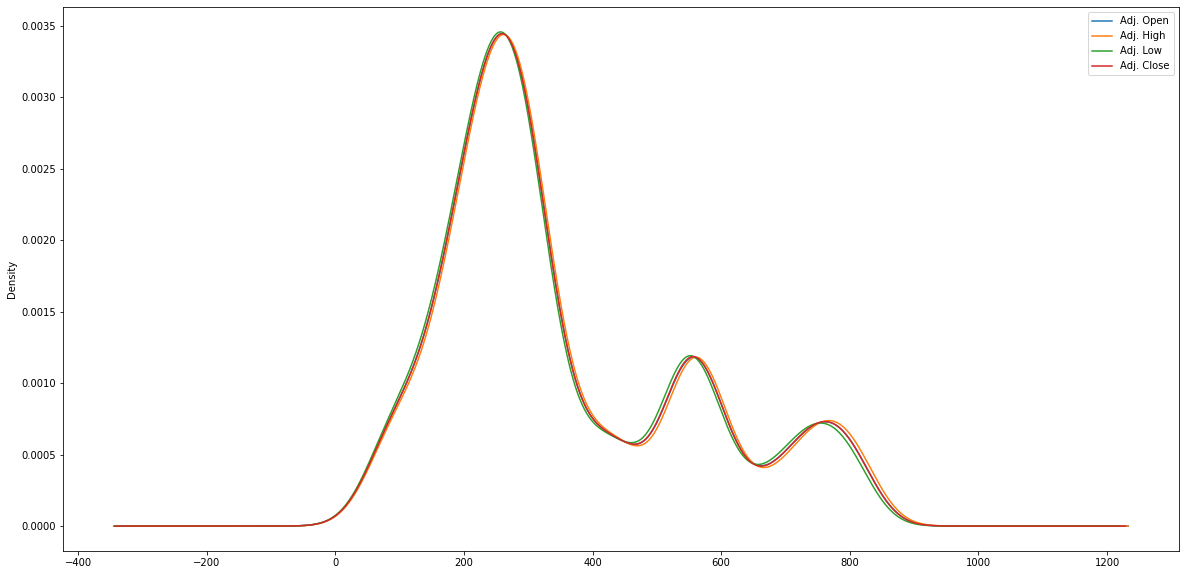

In [13]:
stock_market_dataset[['Adj. Open','Adj. High','Adj. Low','Adj. Close']].plot.density()

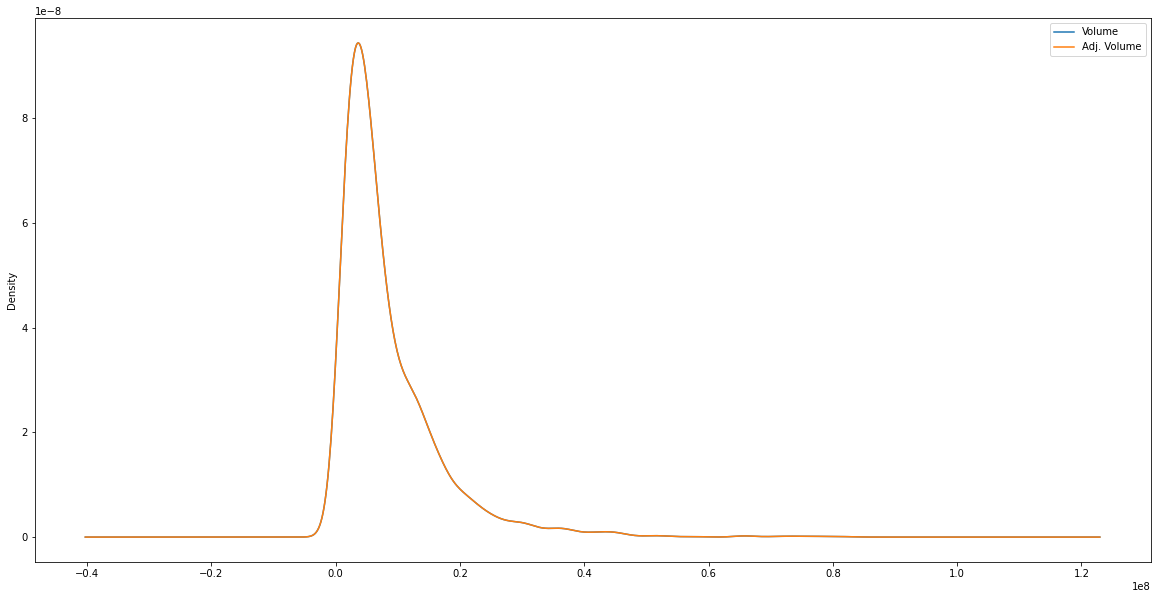

In [14]:
stock_market_dataset[['Volume','Adj. Volume']].plot.density()

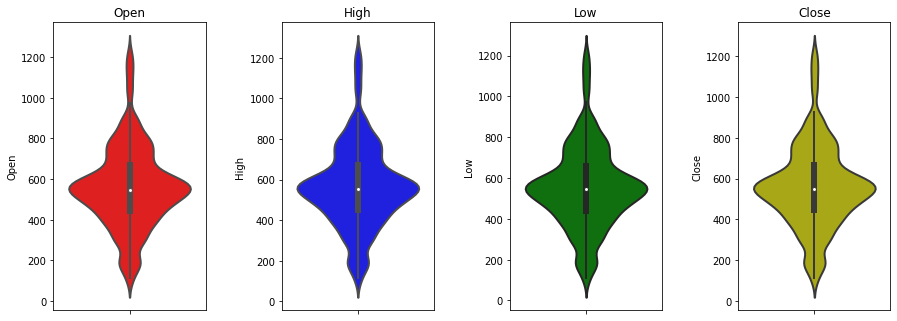

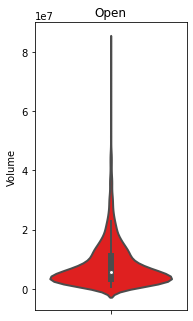

In [15]:
plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(141)
plt.title('Open')
sns.violinplot(y = 'Open' , data = stock_market_dataset , color = 'r' , linewidth = 2)

plt.subplot(142)
plt.title('High')
sns.violinplot(y = 'High' , data = stock_market_dataset , color = 'b' , linewidth = 2)

plt.subplot(143)
plt.title('Low')
sns.violinplot(y = 'Low' , data = stock_market_dataset , color = 'g' , linewidth = 2)

plt.subplot(144)
plt.title('Close')
sns.violinplot(y = 'Close' , data = stock_market_dataset , color = 'y' , linewidth = 2)

plt.show()

plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(141)
plt.title('Open')
sns.violinplot(y = 'Volume' , data = stock_market_dataset , color = 'r' , linewidth = 2)

plt.show()

**Observations:**
* Most of the time `Open`, `High`, `Low`, and `Close` Price are in between *400 to 800*.
* Maximum Volume is in between *0 and 2*. (1e7 on the axis equals 10,000,000)

### **Adding Year and Month Column** <a class="anchor" id="Year_Month"></a>

In [16]:
stock_market_dataset['Year'] = stock_market_dataset['Date'].str.split('-').str[0]
stock_market_dataset['Month'] = stock_market_dataset['Date'].str.split('-').str[1]

In [17]:
print('Year:',stock_market_dataset['Year'].unique().tolist(),'\n')

print('Month:',stock_market_dataset['Month'].unique(),'\n')

Year: ['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'] 

Month: ['08' '09' '10' '11' '12' '01' '02' '03' '04' '05' '06' '07'] 



**Replacing Month number with corresponding name**

In [18]:
stock_market_dataset["Month"].replace({"01": "Jan",
                                      "02": "Feb",
                                      "03": "Mar",
                                      "04": "Apr",
                                      "05": "May",
                                      "06": "June",
                                      "07": "July",
                                      "08": "Aug",
                                      "09": "Sept",
                                      "10": "Oct",
                                      "11": "Nov",
                                      "12": "Dec"}, inplace=True)

print('Month:',stock_market_dataset['Month'].unique().tolist(),'\n')

Month: ['Aug', 'Sept', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July'] 



In [19]:
stock_market_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3125 entries, 0 to 3124
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         3125 non-null   object 
 1   Open         3125 non-null   float64
 2   High         3125 non-null   float64
 3   Low          3125 non-null   float64
 4   Close        3125 non-null   float64
 5   Volume       3125 non-null   int64  
 6   Ex-Dividend  3125 non-null   float64
 7   Split Ratio  3125 non-null   int64  
 8   Adj. Open    3125 non-null   float64
 9   Adj. High    3125 non-null   float64
 10  Adj. Low     3125 non-null   float64
 11  Adj. Close   3125 non-null   float64
 12  Adj. Volume  3125 non-null   int64  
 13  Year         3125 non-null   object 
 14  Month        3125 non-null   object 
dtypes: float64(9), int64(3), object(3)
memory usage: 366.3+ KB


**Rearranging Database Columns**

In [20]:
stock_market_dataset = stock_market_dataset[[
    'Date',
    'Year',
    'Month',
    'Open',
    'High',
    'Low',
    'Close',
    'Volume',
    'Ex-Dividend',
    'Split Ratio',
    'Adj. Open',
    'Adj. High',
    'Adj. Low',
    'Adj. Close',
    'Adj. Volume'
]]

stock_market_dataset.head()

,Date,Year,Month,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2004-08-19,2004,Aug,100.01,104.06,95.96,100.335,44659000,0.0,1,50.159839,52.191109,48.128568,50.322842,44659000
1,2004-08-20,2004,Aug,101.01,109.08,100.50,108.310,22834300,0.0,1,50.661387,54.708881,50.405597,54.322689,22834300
2,2004-08-23,2004,Aug,110.76,113.48,109.05,109.400,18256100,0.0,1,55.551482,56.915693,54.693835,54.869377,18256100
3,2004-08-24,2004,Aug,111.24,111.60,103.57,104.870,15247300,0.0,1,55.792225,55.972783,51.945350,52.597363,15247300
4,2004-08-25,2004,Aug,104.76,108.00,103.88,106.000,9188600,0.0,1,52.542193,54.167209,52.100830,53.164113,9188600


### Yearly Record Count Plot <a class="anchor" id="Year_count"></a>

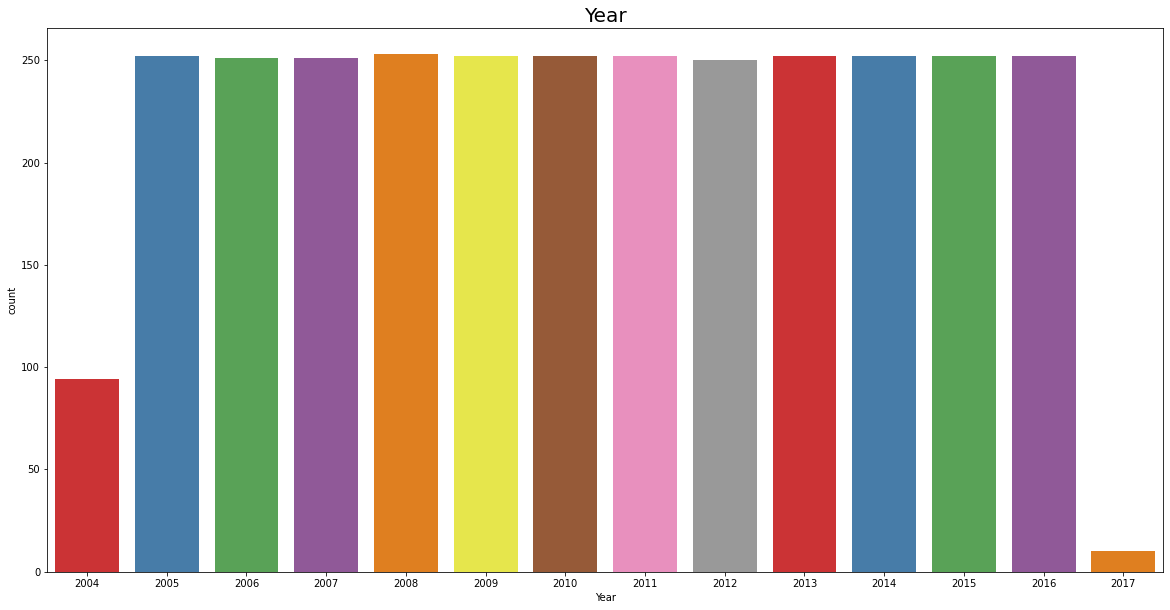

In [21]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x = 'Year' , data = stock_market_dataset , palette = 'Set1')
plt.title('Year',fontsize = 20)
plt.show()

**Observations:**
* In our database records from year *2004 to 2017* is present.
* Very less record is present for year *2017* which is followed by *2004*.
* Most of years are having number of records around *250*.

### Year against all Variables <a class="anchor" id="year_against_all">

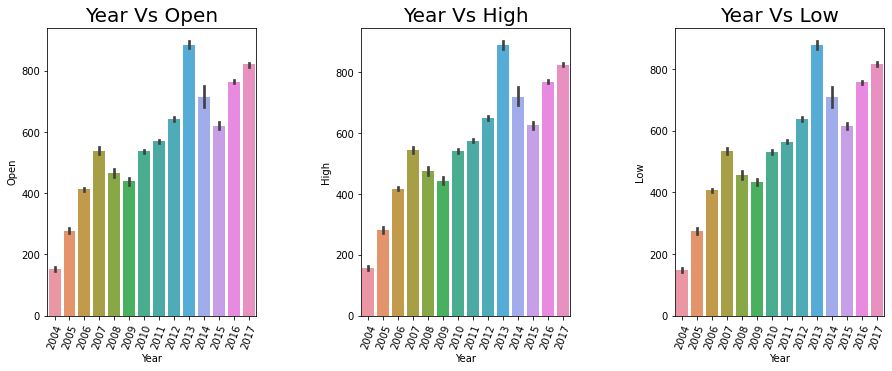

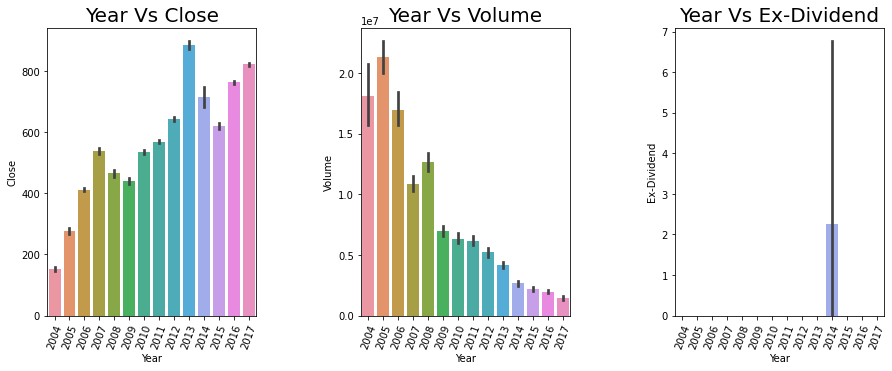

In [22]:
plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Year Vs Open',fontsize = 20)
sns.barplot(y = "Open" , x = "Year" , data = stock_market_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Year Vs High',fontsize = 20)
sns.barplot(y = "High" , x = "Year" , data = stock_market_dataset)
plt.xticks(rotation=70)

plt.subplot(133)
plt.title('Year Vs Low',fontsize = 20)
sns.barplot(y = "Low" , x = "Year" , data = stock_market_dataset)
plt.xticks(rotation=70)

plt.show()

plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Year Vs Close',fontsize = 20)
sns.barplot(y = "Close" , x = "Year" , data = stock_market_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Year Vs Volume',fontsize = 20)
sns.barplot(y = "Volume" , x = "Year" , data = stock_market_dataset)
plt.xticks(rotation=70)

plt.subplot(133)
plt.title('Year Vs Ex-Dividend',fontsize = 20)
sns.barplot(y = "Ex-Dividend" , x = "Year" , data = stock_market_dataset)
plt.xticks(rotation=70)

plt.show()

### Month against all Variables <a class="anchor" id="month_against_all">

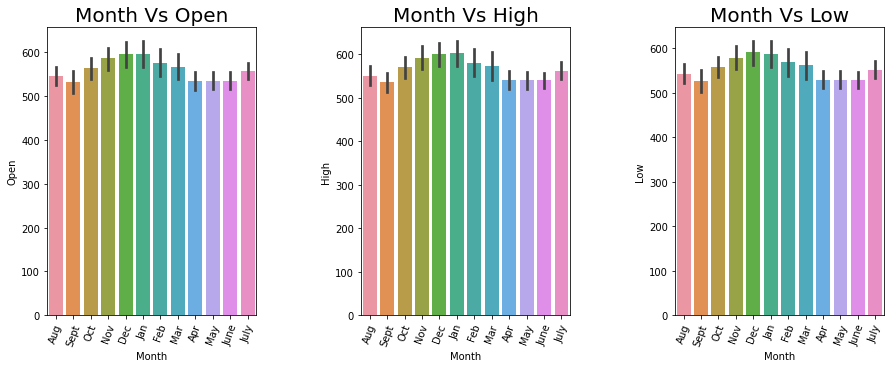

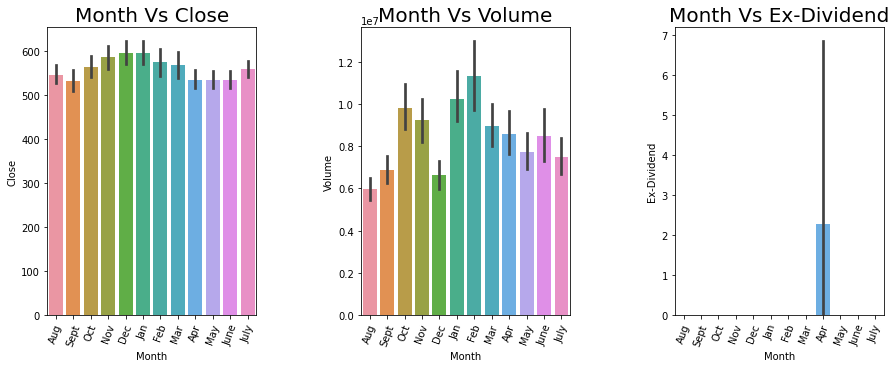

In [23]:
plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month Vs Open',fontsize = 20)
sns.barplot(y = "Open" , x = "Month" , data = stock_market_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month Vs High',fontsize = 20)
sns.barplot(y = "High" , x = "Month" , data = stock_market_dataset)
plt.xticks(rotation=70)

plt.subplot(133)
plt.title('Month Vs Low',fontsize = 20)
sns.barplot(y = "Low" , x = "Month" , data = stock_market_dataset)
plt.xticks(rotation=70)

plt.show()

plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month Vs Close',fontsize = 20)
sns.barplot(y = "Close" , x = "Month" , data = stock_market_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month Vs Volume',fontsize = 20)
sns.barplot(y = "Volume" , x = "Month" , data = stock_market_dataset)
plt.xticks(rotation=70)

plt.subplot(133)
plt.title('Month Vs Ex-Dividend',fontsize = 20)
sns.barplot(y = "Ex-Dividend" , x = "Month" , data = stock_market_dataset)
plt.xticks(rotation=70)

plt.show()

## Plotting graphs for Individual Year <a class="anchor" id="Individual_Year"></a>
* [2004](#2004)
* [2005](#2005)
* [2006](#2006)
* [2007](#2007)
* [2008](#2008)
* [2009](#2009)
* [2010](#2010)
* [2011](#2011)
* [2012](#2012)
* [2013](#2013)
* [2014](#2014)
* [2015](#2015)
* [2016](#2016)
* [2017](#2017)

### Year 2004<a class="anchor" id="2004"></a>

In [24]:
Year_2004_dataset = stock_market_dataset[stock_market_dataset.Year=='2004']
print(Year_2004_dataset.shape)
print(Year_2004_dataset.Month.unique().tolist())
Year_2004_dataset.head()

(94, 15)
['Aug', 'Sept', 'Oct', 'Nov', 'Dec']


,Date,Year,Month,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2004-08-19,2004,Aug,100.01,104.06,95.96,100.335,44659000,0.0,1,50.159839,52.191109,48.128568,50.322842,44659000
1,2004-08-20,2004,Aug,101.01,109.08,100.50,108.310,22834300,0.0,1,50.661387,54.708881,50.405597,54.322689,22834300
2,2004-08-23,2004,Aug,110.76,113.48,109.05,109.400,18256100,0.0,1,55.551482,56.915693,54.693835,54.869377,18256100
3,2004-08-24,2004,Aug,111.24,111.60,103.57,104.870,15247300,0.0,1,55.792225,55.972783,51.945350,52.597363,15247300
4,2004-08-25,2004,Aug,104.76,108.00,103.88,106.000,9188600,0.0,1,52.542193,54.167209,52.100830,53.164113,9188600


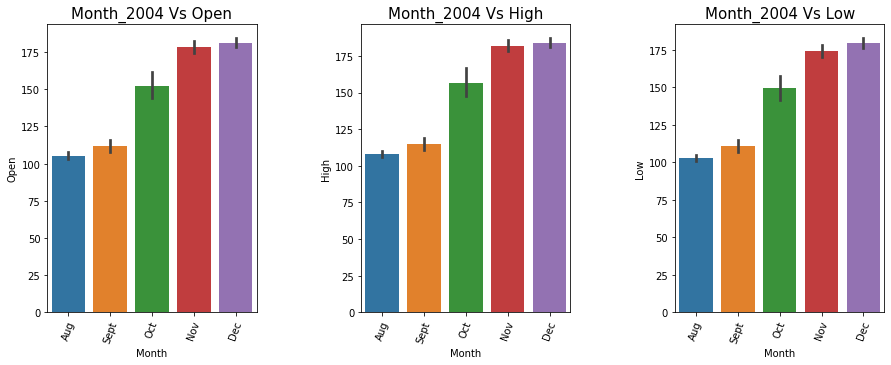

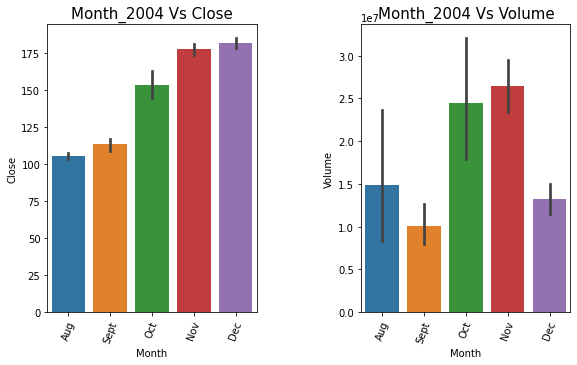

In [25]:
plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month_2004 Vs Open',fontsize = 15)
sns.barplot(y = "Open" , x = "Month" , data = Year_2004_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month_2004 Vs High',fontsize = 15)
sns.barplot(y = "High" , x = "Month" , data = Year_2004_dataset)
plt.xticks(rotation=70)

plt.subplot(133)
plt.title('Month_2004 Vs Low',fontsize = 15)
sns.barplot(y = "Low" , x = "Month" , data = Year_2004_dataset)
plt.xticks(rotation=70)

plt.show()

plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month_2004 Vs Close',fontsize = 15)
sns.barplot(y = "Close" , x = "Month" , data = Year_2004_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month_2004 Vs Volume',fontsize = 15)
sns.barplot(y = "Volume" , x = "Month" , data = Year_2004_dataset)
plt.xticks(rotation=70)

# plt.subplot(133)
# plt.title('Month_2004 Vs Ex-Dividend',fontsize = 15)
# sns.barplot(y = "Ex-Dividend" , x = "Month" , data = Year_2004_dataset)
# plt.xticks(rotation=70)

plt.show()

### Year 2005<a class="anchor" id="2005"></a>

In [26]:
Year_2005_dataset = stock_market_dataset[stock_market_dataset.Year=='2005']
print(Year_2005_dataset.shape)
print(Year_2005_dataset.Month.unique().tolist())
Year_2005_dataset.head()

(252, 15)
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']


,Date,Year,Month,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
94,2005-01-03,2005,Jan,197.40,203.64,195.46,202.71,31656700,0.0,1,99.005621,102.135282,98.032617,101.668842,31656700
95,2005-01-04,2005,Jan,201.33,202.93,193.48,194.50,27484200,0.0,1,100.976705,101.779183,97.039552,97.551131,27484200
96,2005-01-05,2005,Jan,193.45,196.90,192.23,193.51,16456700,0.0,1,97.024505,98.754847,96.412617,97.054598,16456700
97,2005-01-06,2005,Jan,195.25,195.90,187.72,188.55,20753400,0.0,1,97.927292,98.253299,94.150634,94.566919,20753400
98,2005-01-07,2005,Jan,190.64,194.25,188.78,193.85,19306400,0.0,1,95.615155,97.425744,94.682275,97.225125,19306400


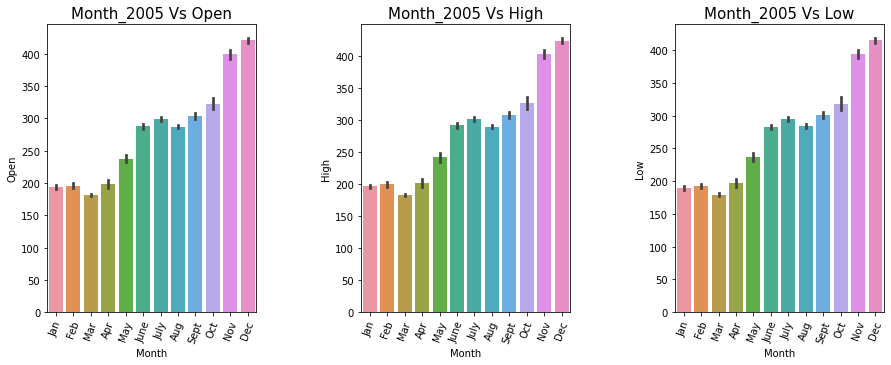

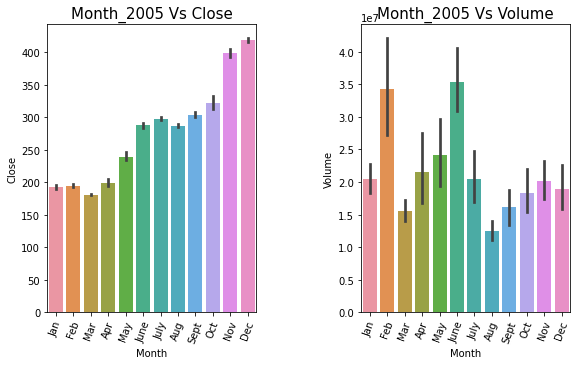

In [27]:
plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month_2005 Vs Open',fontsize = 15)
sns.barplot(y = "Open" , x = "Month" , data = Year_2005_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month_2005 Vs High',fontsize = 15)
sns.barplot(y = "High" , x = "Month" , data = Year_2005_dataset)
plt.xticks(rotation=70)

plt.subplot(133)
plt.title('Month_2005 Vs Low',fontsize = 15)
sns.barplot(y = "Low" , x = "Month" , data = Year_2005_dataset)
plt.xticks(rotation=70)

plt.show()

plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month_2005 Vs Close',fontsize = 15)
sns.barplot(y = "Close" , x = "Month" , data = Year_2005_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month_2005 Vs Volume',fontsize = 15)
sns.barplot(y = "Volume" , x = "Month" , data = Year_2005_dataset)
plt.xticks(rotation=70)

# plt.subplot(133)
# plt.title('Month_2005 Vs Ex-Dividend',fontsize = 15)
# sns.barplot(y = "Ex-Dividend" , x = "Month" , data = Year_2005_dataset)
# plt.xticks(rotation=70)

plt.show()

### Year 2006<a class="anchor" id="2006"></a>

In [28]:
Year_2006_dataset = stock_market_dataset[stock_market_dataset.Year=='2006']
print(Year_2006_dataset.shape)
print(Year_2006_dataset.Month.unique().tolist())
Year_2006_dataset.head()

(251, 15)
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']


,Date,Year,Month,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
346,2006-01-03,2006,Jan,422.52,435.67,418.22,435.2300,26216100,0.0,1,211.914159,218.509518,209.757501,218.288837,26216100
347,2006-01-04,2006,Jan,443.90,448.96,439.75,445.2400,30542200,0.0,1,222.637260,225.175094,220.555835,223.309335,30542200
348,2006-01-05,2006,Jan,446.00,451.55,441.50,451.2400,21594900,0.0,1,223.690511,226.474104,221.433544,226.318624,21594900
349,2006-01-06,2006,Jan,456.87,470.50,453.24,465.6600,35478200,0.0,1,229.142340,235.978443,227.321720,233.550949,35478200
350,2006-01-09,2006,Jan,466.15,473.40,460.94,466.9001,25558200,0.0,1,233.796708,237.432933,231.183642,234.172919,25558200


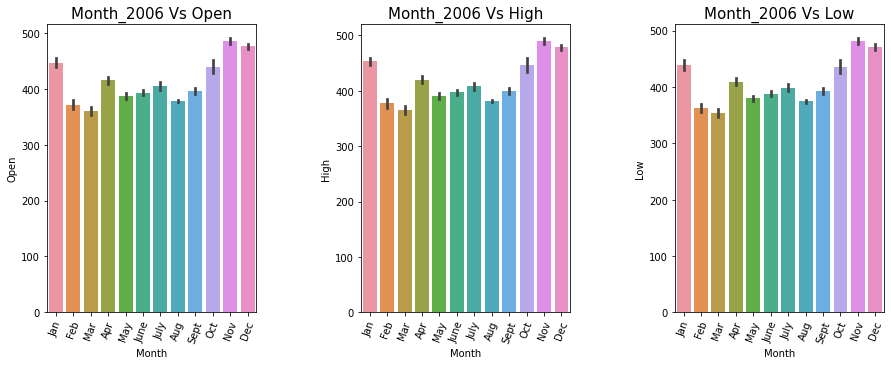

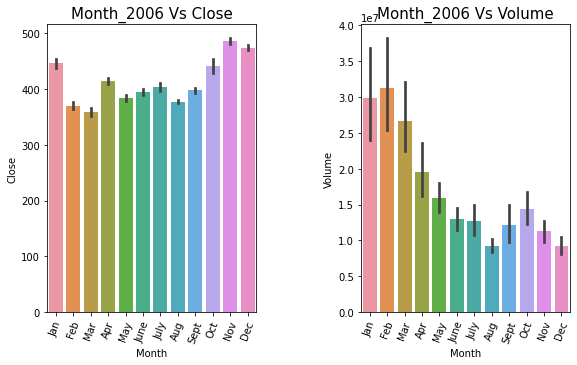

In [29]:
plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month_2006 Vs Open',fontsize = 15)
sns.barplot(y = "Open" , x = "Month" , data = Year_2006_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month_2006 Vs High',fontsize = 15)
sns.barplot(y = "High" , x = "Month" , data = Year_2006_dataset)
plt.xticks(rotation=70)

plt.subplot(133)
plt.title('Month_2006 Vs Low',fontsize = 15)
sns.barplot(y = "Low" , x = "Month" , data = Year_2006_dataset)
plt.xticks(rotation=70)

plt.show()

plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month_2006 Vs Close',fontsize = 15)
sns.barplot(y = "Close" , x = "Month" , data = Year_2006_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month_2006 Vs Volume',fontsize = 15)
sns.barplot(y = "Volume" , x = "Month" , data = Year_2006_dataset)
plt.xticks(rotation=70)

# plt.subplot(133)
# plt.title('Month_2006 Vs Ex-Dividend',fontsize = 15)
# sns.barplot(y = "Ex-Dividend" , x = "Month" , data = Year_2006_dataset)
# plt.xticks(rotation=70)

plt.show()

### Year 2007<a class="anchor" id="2007"></a>

In [30]:
Year_2007_dataset = stock_market_dataset[stock_market_dataset.Year=='2007']
print(Year_2007_dataset.shape)
print(Year_2007_dataset.Month.unique().tolist())
Year_2007_dataset.head()

(251, 15)
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']


,Date,Year,Month,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
597,2007-01-03,2007,Jan,466.00,476.66,461.11,467.59,15397500,0.0,1,233.721476,239.067980,231.268905,234.518937,15397500
598,2007-01-04,2007,Jan,469.00,483.95,468.35,483.26,15759400,0.0,1,235.226121,242.724267,234.900114,242.378198,15759400
599,2007-01-05,2007,Jan,482.50,487.50,478.11,487.19,13730400,0.0,1,241.997022,244.504763,239.795225,244.349283,13730400
600,2007-01-08,2007,Jan,487.69,489.87,482.20,483.58,9499200,0.0,1,244.600057,245.693432,241.846557,242.538694,9499200
601,2007-01-09,2007,Jan,485.45,488.25,481.20,485.50,10752000,0.0,1,243.476589,244.880924,241.345009,243.501666,10752000


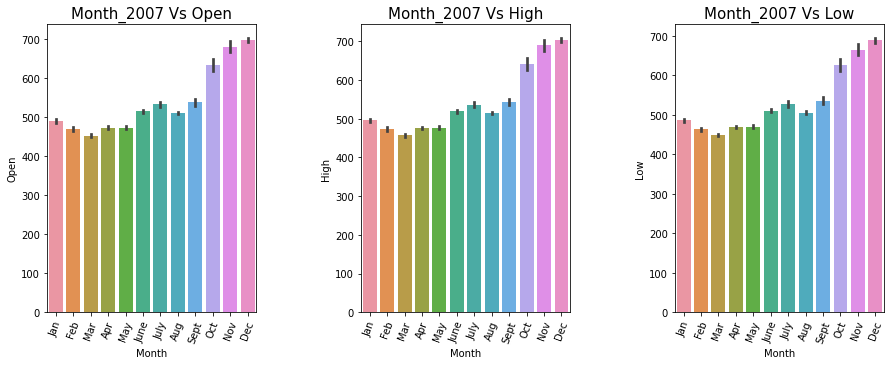

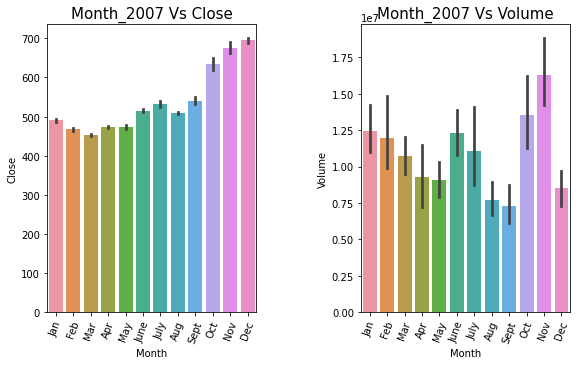

In [31]:
plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month_2007 Vs Open',fontsize = 15)
sns.barplot(y = "Open" , x = "Month" , data = Year_2007_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month_2007 Vs High',fontsize = 15)
sns.barplot(y = "High" , x = "Month" , data = Year_2007_dataset)
plt.xticks(rotation=70)

plt.subplot(133)
plt.title('Month_2007 Vs Low',fontsize = 15)
sns.barplot(y = "Low" , x = "Month" , data = Year_2007_dataset)
plt.xticks(rotation=70)

plt.show()

plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month_2007 Vs Close',fontsize = 15)
sns.barplot(y = "Close" , x = "Month" , data = Year_2007_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month_2007 Vs Volume',fontsize = 15)
sns.barplot(y = "Volume" , x = "Month" , data = Year_2007_dataset)
plt.xticks(rotation=70)

# plt.subplot(133)
# plt.title('Month_2007 Vs Ex-Dividend',fontsize = 15)
# sns.barplot(y = "Ex-Dividend" , x = "Month" , data = Year_2007_dataset)
# plt.xticks(rotation=70)

plt.show()

### Year 2008<a class="anchor" id="2008"></a>

In [32]:
Year_2008_dataset = stock_market_dataset[stock_market_dataset.Year=='2008']
print(Year_2008_dataset.shape)
print(Year_2008_dataset.Month.unique().tolist())
Year_2008_dataset.head()

(253, 15)
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']


,Date,Year,Month,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
848,2008-01-02,2008,Jan,692.87,697.37,677.7301,685.1900,8605100,0.0,1,347.507723,349.764690,339.914333,343.655833,8605100
849,2008-01-03,2008,Jan,685.26,686.85,676.5200,685.3300,6498400,0.0,1,343.690941,344.488403,339.307410,343.726049,6498400
850,2008-01-04,2008,Jan,679.69,680.96,655.0000,657.0000,10708800,0.0,1,340.897317,341.534284,328.514092,329.517188,10708800
851,2008-01-07,2008,Jan,653.94,662.28,637.3500,649.2500,12793900,0.0,1,327.982450,332.165363,319.661765,325.630189,12793900
852,2008-01-08,2008,Jan,653.00,659.96,631.0000,631.6799,10667500,0.0,1,327.510995,331.001771,316.476934,316.817937,10667500


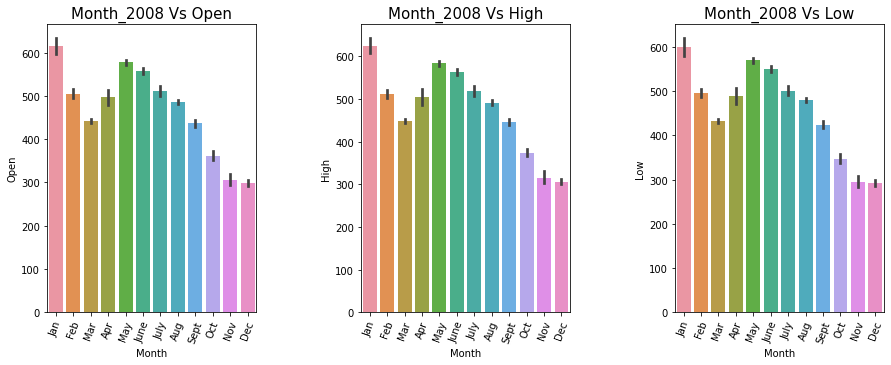

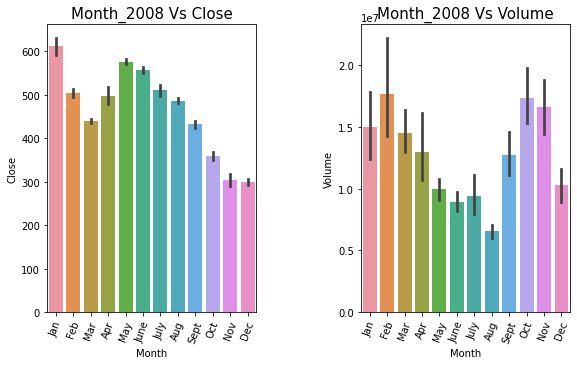

In [33]:
plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month_2008 Vs Open',fontsize = 15)
sns.barplot(y = "Open" , x = "Month" , data = Year_2008_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month_2008 Vs High',fontsize = 15)
sns.barplot(y = "High" , x = "Month" , data = Year_2008_dataset)
plt.xticks(rotation=70)

plt.subplot(133)
plt.title('Month_2008 Vs Low',fontsize = 15)
sns.barplot(y = "Low" , x = "Month" , data = Year_2008_dataset)
plt.xticks(rotation=70)

plt.show()

plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month_2008 Vs Close',fontsize = 15)
sns.barplot(y = "Close" , x = "Month" , data = Year_2008_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month_2008 Vs Volume',fontsize = 15)
sns.barplot(y = "Volume" , x = "Month" , data = Year_2008_dataset)
plt.xticks(rotation=70)

# plt.subplot(133)
# plt.title('Month_2008 Vs Ex-Dividend',fontsize = 15)
# sns.barplot(y = "Ex-Dividend" , x = "Month" , data = Year_2008_dataset)
# plt.xticks(rotation=70)

plt.show()

### Year 2009<a class="anchor" id="2009"></a>

In [34]:
Year_2009_dataset = stock_market_dataset[stock_market_dataset.Year=='2009']
print(Year_2009_dataset.shape)
print(Year_2009_dataset.Month.unique().tolist())
Year_2009_dataset.head()

(252, 15)
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']


,Date,Year,Month,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
1101,2009-01-02,2009,Jan,308.5995,321.8199,305.50,321.32,7213700,0.0,1,154.777533,161.408202,153.222985,161.157478,7213700
1102,2009-01-05,2009,Jan,321.0000,331.2400,315.00,328.05,9768200,0.0,1,160.996982,166.132836,157.987693,164.532897,9768200
1103,2009-01-06,2009,Jan,332.9800,340.7990,326.39,334.06,12837500,0.0,1,167.005530,170.927136,163.700327,167.547202,12837500
1104,2009-01-07,2009,Jan,328.3200,330.9099,318.75,322.01,8980000,0.0,1,164.668315,165.967275,159.868499,161.503546,8980000
1105,2009-01-08,2009,Jan,318.2800,325.1900,317.34,325.19,7194100,0.0,1,159.632771,163.098469,159.161316,163.098469,7194100


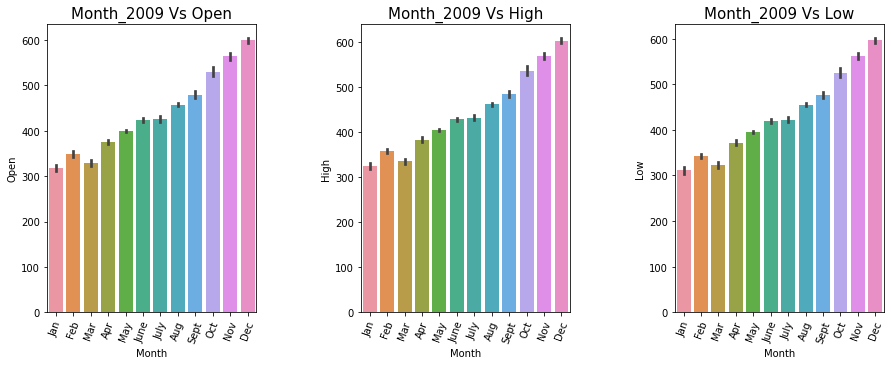

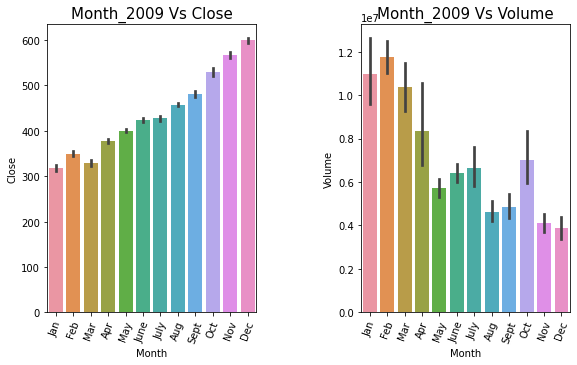

In [35]:
plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month_2009 Vs Open',fontsize = 15)
sns.barplot(y = "Open" , x = "Month" , data = Year_2009_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month_2009 Vs High',fontsize = 15)
sns.barplot(y = "High" , x = "Month" , data = Year_2009_dataset)
plt.xticks(rotation=70)

plt.subplot(133)
plt.title('Month_2009 Vs Low',fontsize = 15)
sns.barplot(y = "Low" , x = "Month" , data = Year_2009_dataset)
plt.xticks(rotation=70)

plt.show()

plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month_2009 Vs Close',fontsize = 15)
sns.barplot(y = "Close" , x = "Month" , data = Year_2009_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month_2009 Vs Volume',fontsize = 15)
sns.barplot(y = "Volume" , x = "Month" , data = Year_2009_dataset)
plt.xticks(rotation=70)

# plt.subplot(133)
# plt.title('Month_2009 Vs Ex-Dividend',fontsize = 15)
# sns.barplot(y = "Ex-Dividend" , x = "Month" , data = Year_2009_dataset)
# plt.xticks(rotation=70)

plt.show()

### Year 2010<a class="anchor" id="2010"></a>

In [36]:
Year_2010_dataset = stock_market_dataset[stock_market_dataset.Year=='2010']
print(Year_2010_dataset.shape)
print(Year_2010_dataset.Month.unique().tolist())
Year_2010_dataset.head()

(252, 15)
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']


,Date,Year,Month,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
1353,2010-01-04,2010,Jan,626.95,629.51,624.24,626.75,3908400,0.0,1,314.445664,315.729627,313.086468,314.345354,3908400
1354,2010-01-05,2010,Jan,627.18,627.84,621.54,623.99,6003300,0.0,1,314.561020,314.892042,311.732288,312.961081,6003300
1355,2010-01-06,2010,Jan,625.86,625.86,606.36,608.26,7949400,0.0,1,313.898976,313.898976,304.118786,305.071727,7949400
1356,2010-01-07,2010,Jan,609.40,610.00,592.65,594.10,12815700,0.0,1,305.643492,305.944421,297.242559,297.969804,12815700
1357,2010-01-08,2010,Jan,592.00,603.25,589.11,602.02,9439100,0.0,1,296.916553,302.558971,295.467079,301.942066,9439100


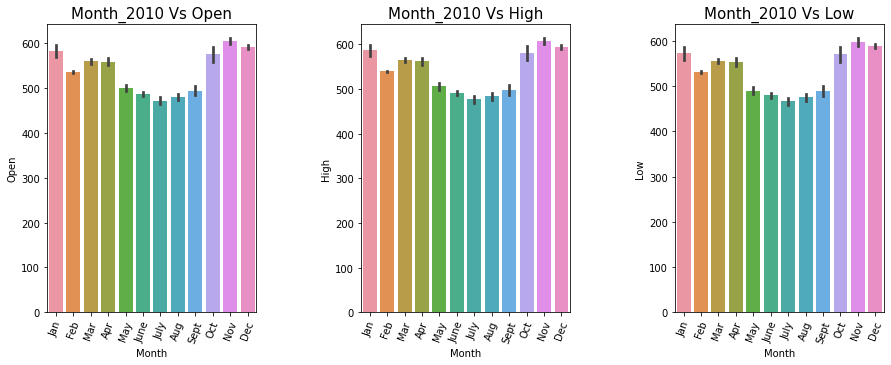

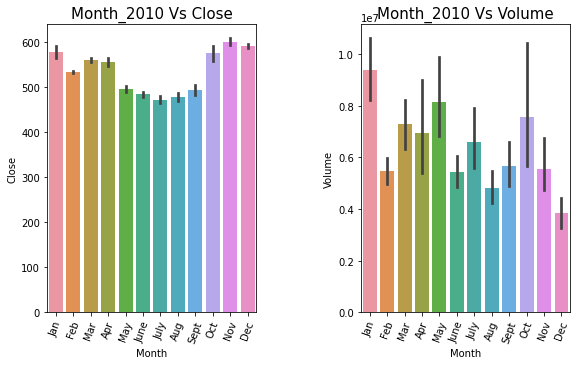

In [37]:
plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month_2010 Vs Open',fontsize = 15)
sns.barplot(y = "Open" , x = "Month" , data = Year_2010_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month_2010 Vs High',fontsize = 15)
sns.barplot(y = "High" , x = "Month" , data = Year_2010_dataset)
plt.xticks(rotation=70)

plt.subplot(133)
plt.title('Month_2010 Vs Low',fontsize = 15)
sns.barplot(y = "Low" , x = "Month" , data = Year_2010_dataset)
plt.xticks(rotation=70)

plt.show()

plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month_2010 Vs Close',fontsize = 15)
sns.barplot(y = "Close" , x = "Month" , data = Year_2010_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month_2010 Vs Volume',fontsize = 15)
sns.barplot(y = "Volume" , x = "Month" , data = Year_2010_dataset)
plt.xticks(rotation=70)

# plt.subplot(133)
# plt.title('Month_2010 Vs Ex-Dividend',fontsize = 15)
# sns.barplot(y = "Ex-Dividend" , x = "Month" , data = Year_2010_dataset)
# plt.xticks(rotation=70)

plt.show()

### Year 2011<a class="anchor" id="2011"></a>

In [38]:
Year_2011_dataset = stock_market_dataset[stock_market_dataset.Year=='2011']
print(Year_2011_dataset.shape)
print(Year_2011_dataset.Month.unique().tolist())
Year_2011_dataset.head()

(252, 15)
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']


,Date,Year,Month,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
1605,2011-01-03,2011,Jan,596.48,605.59,596.48,604.35,4725600,0.0,1,299.163489,303.732593,299.163489,303.110674,4725600
1606,2011-01-04,2011,Jan,605.62,606.18,600.12,602.12,3645300,0.0,1,303.747640,304.028507,300.989125,301.992221,3645300
1607,2011-01-05,2011,Jan,600.07,610.33,600.05,609.07,5059500,0.0,1,300.964047,306.109932,300.954016,305.477981,5059500
1608,2011-01-06,2011,Jan,610.68,618.43,610.05,613.50,4111400,0.0,1,306.285474,310.172473,305.969498,307.699840,4111400
1609,2011-01-07,2011,Jan,615.91,618.25,610.13,616.44,4198100,0.0,1,308.908571,310.082194,306.009622,309.174392,4198100


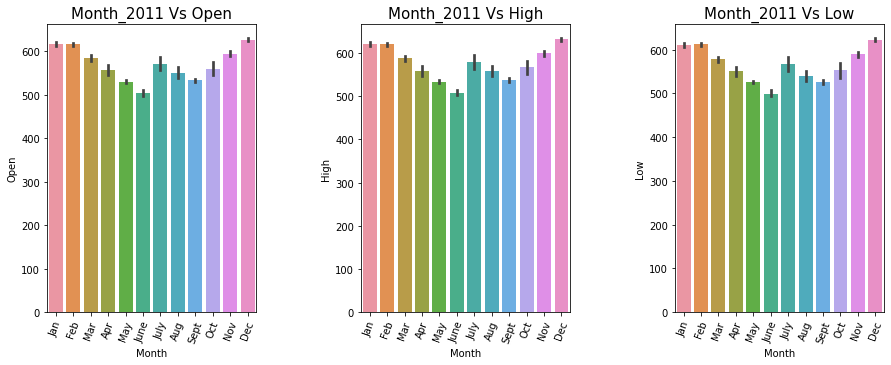

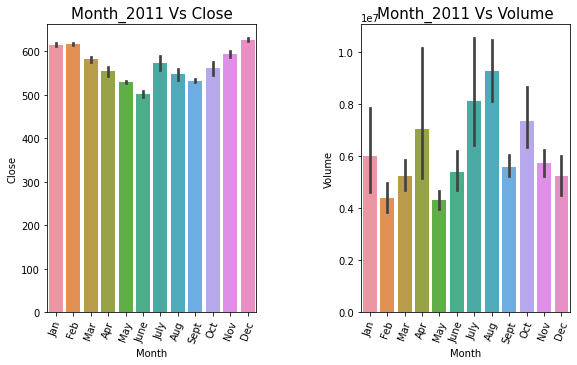

In [39]:
plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month_2011 Vs Open',fontsize = 15)
sns.barplot(y = "Open" , x = "Month" , data = Year_2011_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month_2011 Vs High',fontsize = 15)
sns.barplot(y = "High" , x = "Month" , data = Year_2011_dataset)
plt.xticks(rotation=70)

plt.subplot(133)
plt.title('Month_2011 Vs Low',fontsize = 15)
sns.barplot(y = "Low" , x = "Month" , data = Year_2011_dataset)
plt.xticks(rotation=70)

plt.show()

plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month_2011 Vs Close',fontsize = 15)
sns.barplot(y = "Close" , x = "Month" , data = Year_2011_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month_2011 Vs Volume',fontsize = 15)
sns.barplot(y = "Volume" , x = "Month" , data = Year_2011_dataset)
plt.xticks(rotation=70)

# plt.subplot(133)
# plt.title('Month_2011 Vs Ex-Dividend',fontsize = 15)
# sns.barplot(y = "Ex-Dividend" , x = "Month" , data = Year_2011_dataset)
# plt.xticks(rotation=70)

plt.show()

### Year 2012<a class="anchor" id="2012"></a>

In [40]:
Year_2012_dataset = stock_market_dataset[stock_market_dataset.Year=='2012']
print(Year_2012_dataset.shape)
print(Year_2012_dataset.Month.unique().tolist())
Year_2012_dataset.head()

(250, 15)
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']


,Date,Year,Month,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
1857,2012-01-03,2012,Jan,652.94,668.15,652.37,665.41,7345600,0.0,1,327.480902,335.109451,327.195020,333.735209,7345600
1858,2012-01-04,2012,Jan,665.03,670.25,660.62,668.28,5722200,0.0,1,333.544620,336.162702,331.332793,335.174652,5722200
1859,2012-01-05,2012,Jan,662.13,663.97,656.23,659.01,6559200,0.0,1,332.090130,333.012979,329.130996,330.525300,6559200
1860,2012-01-06,2012,Jan,659.15,660.00,649.79,650.02,5380400,0.0,1,330.595517,331.021833,325.901025,326.016381,5380400
1861,2012-01-09,2012,Jan,646.50,647.00,621.23,622.46,11633500,0.0,1,324.250932,324.501706,311.576808,312.193712,11633500


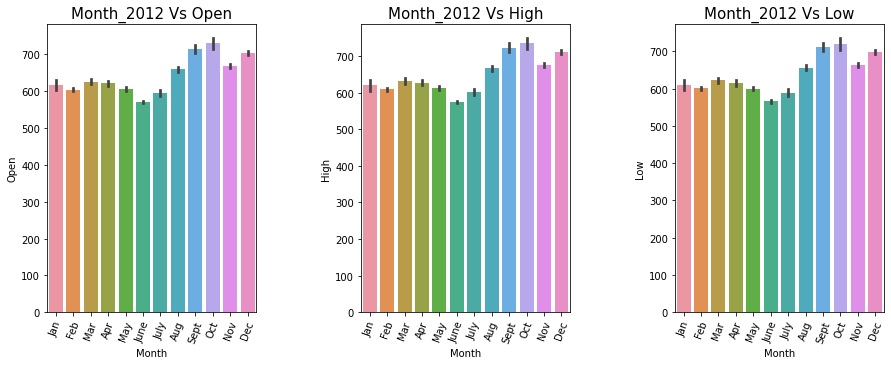

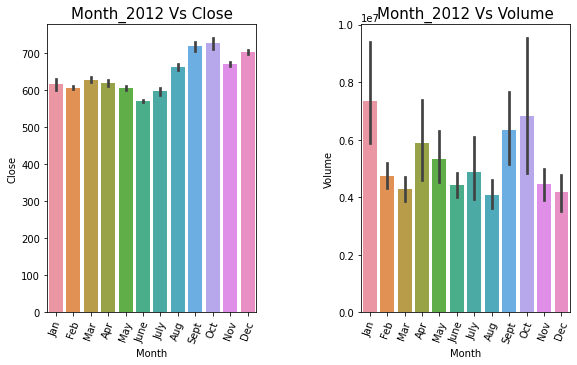

In [41]:
plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month_2012 Vs Open',fontsize = 15)
sns.barplot(y = "Open" , x = "Month" , data = Year_2012_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month_2012 Vs High',fontsize = 15)
sns.barplot(y = "High" , x = "Month" , data = Year_2012_dataset)
plt.xticks(rotation=70)

plt.subplot(133)
plt.title('Month_2012 Vs Low',fontsize = 15)
sns.barplot(y = "Low" , x = "Month" , data = Year_2012_dataset)
plt.xticks(rotation=70)

plt.show()

plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month_2012 Vs Close',fontsize = 15)
sns.barplot(y = "Close" , x = "Month" , data = Year_2012_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month_2012 Vs Volume',fontsize = 15)
sns.barplot(y = "Volume" , x = "Month" , data = Year_2012_dataset)
plt.xticks(rotation=70)

# plt.subplot(133)
# plt.title('Month_2012 Vs Ex-Dividend',fontsize = 15)
# sns.barplot(y = "Ex-Dividend" , x = "Month" , data = Year_2012_dataset)
# plt.xticks(rotation=70)

plt.show()

### Year 2013<a class="anchor" id="2013"></a>

In [42]:
Year_2013_dataset = stock_market_dataset[stock_market_dataset.Year=='2013']
print(Year_2013_dataset.shape)
print(Year_2013_dataset.Month.unique().tolist())
Year_2013_dataset.head()

(252, 15)
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']


,Date,Year,Month,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
2107,2013-01-02,2013,Jan,719.42,727.0000,716.5500,723.25,5077500,0.0,1,360.823829,364.625564,359.384385,362.744758,5077500
2108,2013-01-03,2013,Jan,724.93,731.9300,720.7200,723.67,4631700,0.0,1,363.587359,367.098197,361.475841,362.955409,4631700
2109,2013-01-04,2013,Jan,729.34,741.4700,727.6801,737.97,5521400,0.0,1,365.799187,371.882967,364.966667,370.127548,5521400
2110,2013-01-07,2013,Jan,735.45,739.3800,730.5800,734.75,3308000,0.0,1,368.863647,370.834731,366.421107,368.512563,3308000
2111,2013-01-08,2013,Jan,735.54,736.2999,724.4300,733.30,3348800,0.0,1,368.908786,369.289913,363.336585,367.785318,3348800


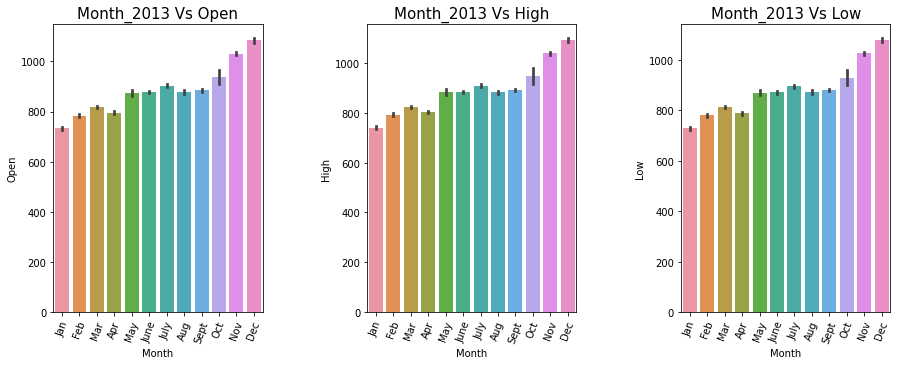

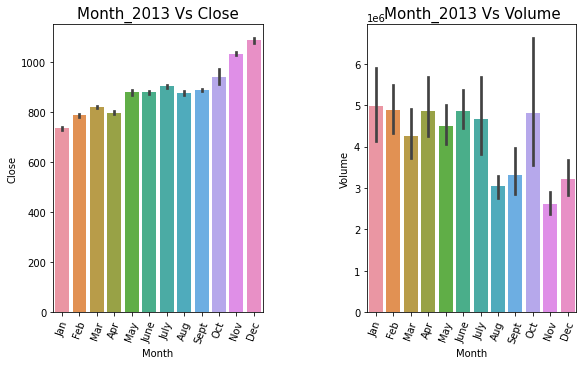

In [43]:
plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month_2013 Vs Open',fontsize = 15)
sns.barplot(y = "Open" , x = "Month" , data = Year_2013_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month_2013 Vs High',fontsize = 15)
sns.barplot(y = "High" , x = "Month" , data = Year_2013_dataset)
plt.xticks(rotation=70)

plt.subplot(133)
plt.title('Month_2013 Vs Low',fontsize = 15)
sns.barplot(y = "Low" , x = "Month" , data = Year_2013_dataset)
plt.xticks(rotation=70)

plt.show()

plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month_2013 Vs Close',fontsize = 15)
sns.barplot(y = "Close" , x = "Month" , data = Year_2013_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month_2013 Vs Volume',fontsize = 15)
sns.barplot(y = "Volume" , x = "Month" , data = Year_2013_dataset)
plt.xticks(rotation=70)

# plt.subplot(133)
# plt.title('Month_2013 Vs Ex-Dividend',fontsize = 15)
# sns.barplot(y = "Ex-Dividend" , x = "Month" , data = Year_2013_dataset)
# plt.xticks(rotation=70)

plt.show()

### Year 2014<a class="anchor" id="2014"></a>

In [44]:
Year_2014_dataset = stock_market_dataset[stock_market_dataset.Year=='2014']
print(Year_2014_dataset.shape)
print(Year_2014_dataset.Month.unique().tolist())
Year_2014_dataset.head()

(252, 15)
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']


,Date,Year,Month,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
2359,2014-01-02,2014,Jan,1115.46,1117.75,1108.26,1113.12,3639100,0.0,1,559.456990,560.605536,555.845843,558.283367,3639100
2360,2014-01-03,2014,Jan,1115.00,1116.93,1104.93,1105.00,3330000,0.0,1,559.226278,560.194266,554.175687,554.210796,3330000
2361,2014-01-06,2014,Jan,1113.01,1118.86,1106.44,1117.32,3535000,0.0,1,558.228197,561.162254,554.933025,560.389870,3535000
2362,2014-01-07,2014,Jan,1125.00,1139.69,1121.16,1138.86,5100000,0.0,1,564.241760,571.609504,562.315815,571.193219,5100000
2363,2014-01-08,2014,Jan,1146.00,1147.32,1133.29,1141.23,4480500,0.0,1,574.774273,575.436317,568.399595,572.381888,4480500


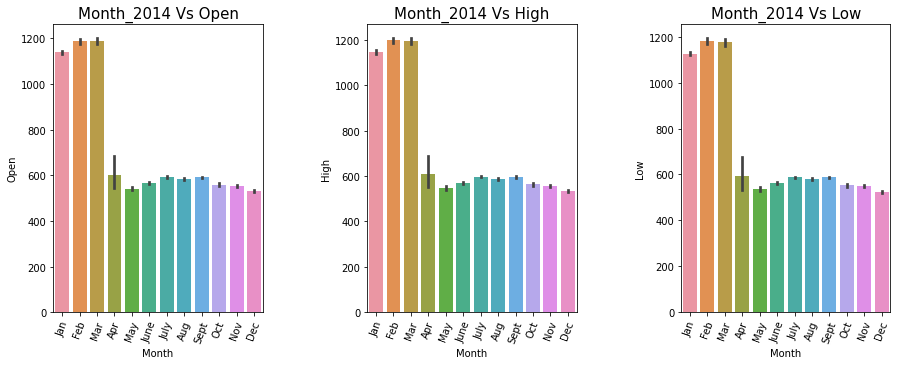

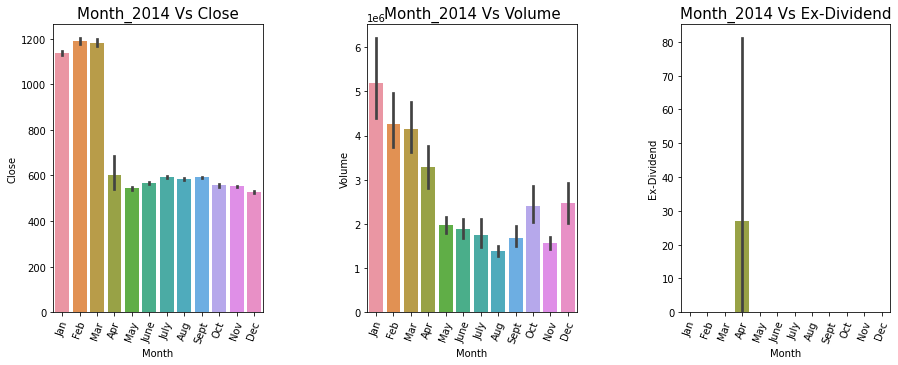

[]

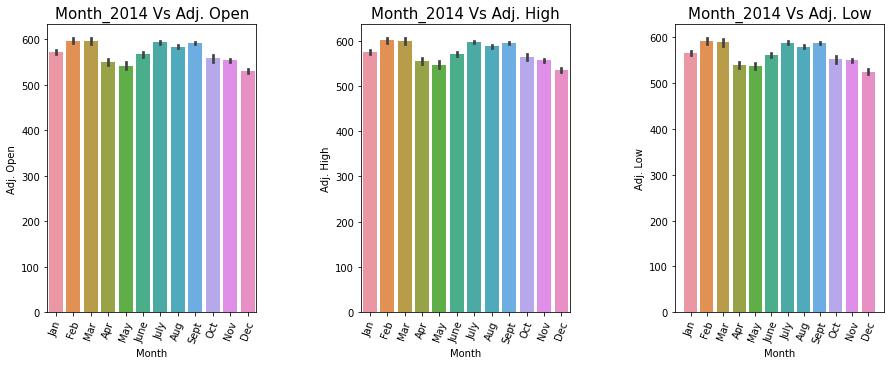

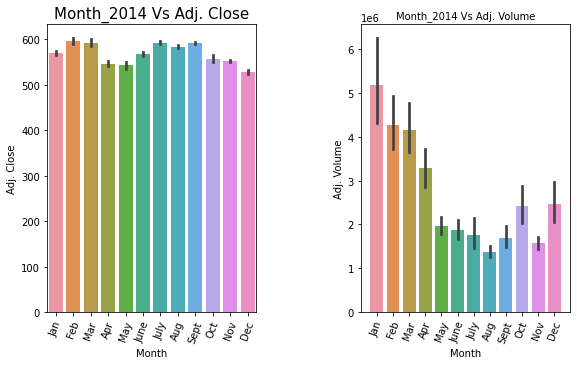

In [45]:
plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month_2014 Vs Open',fontsize = 15)
sns.barplot(y = "Open" , x = "Month" , data = Year_2014_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month_2014 Vs High',fontsize = 15)
sns.barplot(y = "High" , x = "Month" , data = Year_2014_dataset)
plt.xticks(rotation=70)

plt.subplot(133)
plt.title('Month_2014 Vs Low',fontsize = 15)
sns.barplot(y = "Low" , x = "Month" , data = Year_2014_dataset)
plt.xticks(rotation=70)

plt.show()

plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month_2014 Vs Close',fontsize = 15)
sns.barplot(y = "Close" , x = "Month" , data = Year_2014_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month_2014 Vs Volume',fontsize = 15)
sns.barplot(y = "Volume" , x = "Month" , data = Year_2014_dataset)
plt.xticks(rotation=70)

plt.subplot(133)
plt.title('Month_2014 Vs Ex-Dividend',fontsize = 15)
sns.barplot(y = "Ex-Dividend" , x = "Month" , data = Year_2014_dataset)
plt.xticks(rotation=70)

plt.show()

plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month_2014 Vs Adj. Open',fontsize = 15)
sns.barplot(y = "Adj. Open" , x = "Month" , data = Year_2014_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month_2014 Vs Adj. High',fontsize = 15)
sns.barplot(y = "Adj. High" , x = "Month" , data = Year_2014_dataset)
plt.xticks(rotation=70)

plt.subplot(133)
plt.title('Month_2014 Vs Adj. Low',fontsize = 15)
sns.barplot(y = "Adj. Low" , x = "Month" , data = Year_2014_dataset)
plt.xticks(rotation=70)

plt.plot()

plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month_2014 Vs Adj. Close',fontsize = 15)
sns.barplot(y = "Adj. Close" , x = "Month" , data = Year_2014_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month_2014 Vs Adj. Volume',fontsize = 10)
sns.barplot(y = "Adj. Volume" , x = "Month" , data = Year_2014_dataset)
plt.xticks(rotation=70)

plt.plot()

### Year 2015<a class="anchor" id="2015"></a>

In [46]:
Year_2015_dataset = stock_market_dataset[stock_market_dataset.Year=='2015']
print(Year_2015_dataset.shape)
print(Year_2015_dataset.Month.unique().tolist())
Year_2015_dataset.head()

(252, 15)
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']


,Date,Year,Month,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
2611,2015-01-02,2015,Jan,532.60,535.8000,527.88,529.55,1327870,0.0,1,532.60,535.8000,527.88,529.55,1327870
2612,2015-01-05,2015,Jan,527.15,527.9899,517.75,519.46,2059119,0.0,1,527.15,527.9899,517.75,519.46,2059119
2613,2015-01-06,2015,Jan,520.50,521.2100,505.55,506.64,2731813,0.0,1,520.50,521.2100,505.55,506.64,2731813
2614,2015-01-07,2015,Jan,510.95,511.4900,503.65,505.15,2345875,0.0,1,510.95,511.4900,503.65,505.15,2345875
2615,2015-01-08,2015,Jan,501.51,507.5000,495.02,506.91,3662224,0.0,1,501.51,507.5000,495.02,506.91,3662224


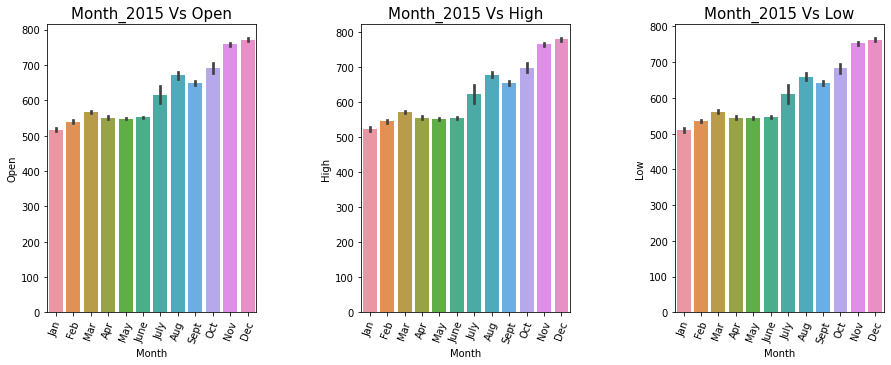

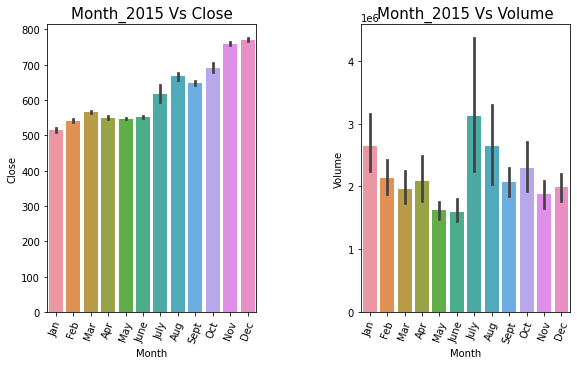

In [47]:
plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month_2015 Vs Open',fontsize = 15)
sns.barplot(y = "Open" , x = "Month" , data = Year_2015_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month_2015 Vs High',fontsize = 15)
sns.barplot(y = "High" , x = "Month" , data = Year_2015_dataset)
plt.xticks(rotation=70)

plt.subplot(133)
plt.title('Month_2015 Vs Low',fontsize = 15)
sns.barplot(y = "Low" , x = "Month" , data = Year_2015_dataset)
plt.xticks(rotation=70)

plt.show()

plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month_2015 Vs Close',fontsize = 15)
sns.barplot(y = "Close" , x = "Month" , data = Year_2015_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month_2015 Vs Volume',fontsize = 15)
sns.barplot(y = "Volume" , x = "Month" , data = Year_2015_dataset)
plt.xticks(rotation=70)

# plt.subplot(133)
# plt.title('Month_2015 Vs Ex-Dividend',fontsize = 15)
# sns.barplot(y = "Ex-Dividend" , x = "Month" , data = Year_2015_dataset)
# plt.xticks(rotation=70)

plt.show()

### Year 2016<a class="anchor" id="2016"></a>

In [48]:
Year_2016_dataset = stock_market_dataset[stock_market_dataset.Year=='2016']
print(Year_2016_dataset.shape)
print(Year_2016_dataset.Month.unique().tolist())
Year_2016_dataset.head()

(252, 15)
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']


,Date,Year,Month,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
2863,2016-01-04,2016,Jan,762.20,762.20,747.5400,759.44,3369068,0.0,1,762.20,762.20,747.5400,759.44,3369068
2864,2016-01-05,2016,Jan,764.10,769.20,755.6500,761.53,2260795,0.0,1,764.10,769.20,755.6500,761.53,2260795
2865,2016-01-06,2016,Jan,750.37,765.73,748.0000,759.33,2410301,0.0,1,750.37,765.73,748.0000,759.33,2410301
2866,2016-01-07,2016,Jan,746.49,755.31,735.2800,741.00,3156563,0.0,1,746.49,755.31,735.2800,741.00,3156563
2867,2016-01-08,2016,Jan,747.80,750.12,728.9201,730.91,2375348,0.0,1,747.80,750.12,728.9201,730.91,2375348


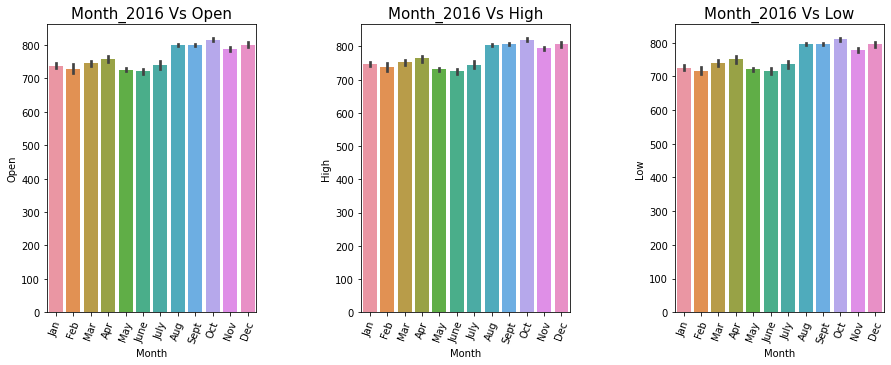

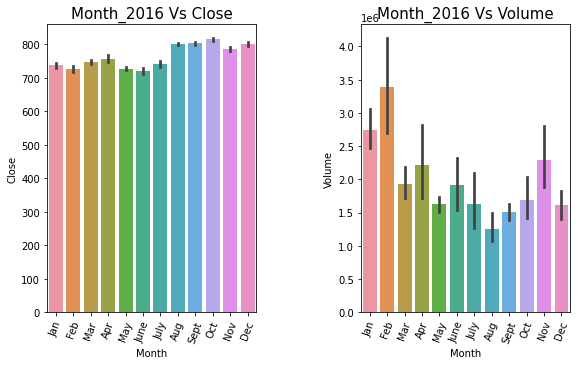

In [49]:
plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month_2016 Vs Open',fontsize = 15)
sns.barplot(y = "Open" , x = "Month" , data = Year_2016_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month_2016 Vs High',fontsize = 15)
sns.barplot(y = "High" , x = "Month" , data = Year_2016_dataset)
plt.xticks(rotation=70)

plt.subplot(133)
plt.title('Month_2016 Vs Low',fontsize = 15)
sns.barplot(y = "Low" , x = "Month" , data = Year_2016_dataset)
plt.xticks(rotation=70)

plt.show()

plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(131)
plt.title('Month_2016 Vs Close',fontsize = 15)
sns.barplot(y = "Close" , x = "Month" , data = Year_2016_dataset)
plt.xticks(rotation=70)

plt.subplot(132)
plt.title('Month_2016 Vs Volume',fontsize = 15)
sns.barplot(y = "Volume" , x = "Month" , data = Year_2016_dataset)
plt.xticks(rotation=70)

# plt.subplot(133)
# plt.title('Month_2016 Vs Ex-Dividend',fontsize = 15)
# sns.barplot(y = "Ex-Dividend" , x = "Month" , data = Year_2016_dataset)
# plt.xticks(rotation=70)

plt.show()

### Year 2017<a class="anchor" id="2017"></a>

In [50]:
Year_2017_dataset = stock_market_dataset[stock_market_dataset.Year=='2017']
print(Year_2017_dataset.shape)
print(Year_2017_dataset.Month.unique().tolist())
Year_2017_dataset.head()

(10, 15)
['Jan']


,Date,Year,Month,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
3115,2017-01-03,2017,Jan,800.62,811.435,796.89,807.57,1948199,0.0,1,800.62,811.435,796.89,807.57,1948199
3116,2017-01-04,2017,Jan,809.89,813.430,804.11,807.77,1495919,0.0,1,809.89,813.430,804.11,807.77,1495919
3117,2017-01-05,2017,Jan,807.50,813.740,805.92,813.02,1318301,0.0,1,807.50,813.740,805.92,813.02,1318301
3118,2017-01-06,2017,Jan,814.99,828.960,811.50,825.21,1983025,0.0,1,814.99,828.960,811.50,825.21,1983025
3119,2017-01-09,2017,Jan,826.37,830.430,821.62,827.18,1405091,0.0,1,826.37,830.430,821.62,827.18,1405091


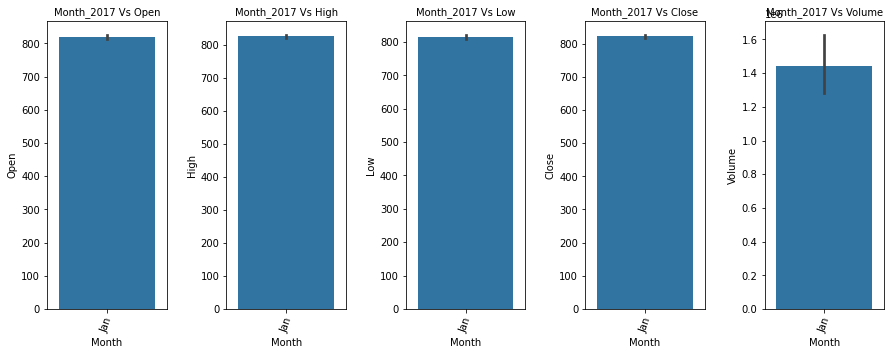

In [51]:
plt.figure(figsize = (15,5))
plt.subplots_adjust(left = 0.125 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.5 , hspace = 0.2)

plt.subplot(151)
plt.title('Month_2017 Vs Open',fontsize = 10)
sns.barplot(y = "Open" , x = "Month" , data = Year_2017_dataset)
plt.xticks(rotation=70)

plt.subplot(152)
plt.title('Month_2017 Vs High',fontsize = 10)
sns.barplot(y = "High" , x = "Month" , data = Year_2017_dataset)
plt.xticks(rotation=70)

plt.subplot(153)
plt.title('Month_2017 Vs Low',fontsize = 10)
sns.barplot(y = "Low" , x = "Month" , data = Year_2017_dataset)
plt.xticks(rotation=70)

plt.subplot(154)
plt.title('Month_2017 Vs Close',fontsize = 10)
sns.barplot(y = "Close" , x = "Month" , data = Year_2017_dataset)
plt.xticks(rotation=70)

plt.subplot(155)
plt.title('Month_2017 Vs Volume',fontsize = 10)
sns.barplot(y = "Volume" , x = "Month" , data = Year_2017_dataset)
plt.xticks(rotation=70)

# plt.subplot(133)
# plt.title('Month_2017 Vs Ex-Dividend',fontsize = 15)
# sns.barplot(y = "Ex-Dividend" , x = "Month" , data = Year_2017_dataset)
# plt.xticks(rotation=70)

plt.show()

In [52]:
stock_market_dataset_2 = stock_market_dataset.drop(stock_market_dataset.iloc[:, -6:] , axis = 1)

In [53]:
stock_market_dataset_2.head()

,Date,Year,Month,Open,High,Low,Close,Volume,Ex-Dividend
0,2004-08-19,2004,Aug,100.01,104.06,95.96,100.335,44659000,0.0
1,2004-08-20,2004,Aug,101.01,109.08,100.50,108.310,22834300,0.0
2,2004-08-23,2004,Aug,110.76,113.48,109.05,109.400,18256100,0.0
3,2004-08-24,2004,Aug,111.24,111.60,103.57,104.870,15247300,0.0
4,2004-08-25,2004,Aug,104.76,108.00,103.88,106.000,9188600,0.0


In [54]:
#normalize data
normalizer = preprocessing.MinMaxScaler((0,1))
smd_exclude_strings = stock_market_dataset_2.select_dtypes(include = [np.number])
normalized = normalizer.fit_transform(smd_exclude_strings)
normalized_df = pd.DataFrame(normalized) 
normalized_df.head()

,0,1,2,3,4,5
0,0.000816,0.002058,0.000000,0.000290,0.540707,0.0
1,0.001703,0.006512,0.004044,0.007410,0.273345,0.0
2,0.010348,0.010416,0.011660,0.008383,0.217260,0.0
3,0.010774,0.008748,0.006779,0.004339,0.180401,0.0
4,0.005028,0.005554,0.007055,0.005347,0.106180,0.0


In [55]:
num_features = 6 
close_value_col_index = 3
#creating training set with time steps.

time_step=30    #1 month time step

n = normalized_df.shape[0] 

#slices of data into time_steps 
X_slice=[]
y_slice=[]
#normalized df dim 3125, 13
# i = 30 - 3125

for i in range(time_step, n):
    X_slice.append(normalized[ i-time_step:i ,  0:num_features ])      #1 example having data from 30 days dim 30x13
    y_slice.append(normalized[i,close_value_col_index])                  #close value data of the 31st day 

#splitting percentage

train_per = 0.7
val_per = 0.2
test_per = 1-(train_per+val_per)  #0.1

#splitting slices for test,val,train and converting into np array
X_train=np.array( X_slice[ 0:int(n*train_per) ])
y_train=np.array( y_slice[ 0:int(n*train_per) ])

X_val=np.array( X_slice[ int(n*train_per):int(n*(train_per+val_per)) ])
y_val=np.array( y_slice[ int(n*train_per):int(n*(train_per+val_per)) ])

X_test=np.array( X_slice[ int(n*(train_per+val_per)): ])
y_test=np.array( y_slice[ int(n*(train_per+val_per)): ])

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], num_features))    
#dimension of X_train 3095, 30, 13
#dimension of y_train  
print(np.array(X_slice).shape)

print(str(X_train.shape)+ " training dataset shape")
print(str(X_val.shape)+ "  val dataset shape")
print(str(X_test.shape)+ "  test dataset shape")

(3095, 30, 6)
(2187, 30, 6) training dataset shape
(625, 30, 6)  val dataset shape
(283, 30, 6)  test dataset shape


In [56]:
#Implementing LSTM
model = keras.models.Sequential()         #initializing network

#input layer
hidden_layer_units = 10
model.add(keras.layers.LSTM(hidden_layer_units,kernel_regularizer=L1L2(0.0001), return_sequences=True, input_shape=(X_train.shape[1],num_features)))

#LSTM layer 2
hidden_layer_units = 10
model.add(keras.layers.LSTM(hidden_layer_units,kernel_regularizer=L1L2(0.0001)))

#Output layer
output_layer_units = 1     #just need the close value
model.add(keras.layers.Dense(output_layer_units))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 70, batch_size = 10)


Epoch 1/70
219/219 [==============================] - 1s 6ms/step - loss: 0.0231
Epoch 2/70
219/219 [==============================] - 1s 6ms/step - loss: 0.0077
Epoch 3/70
219/219 [==============================] - 1s 6ms/step - loss: 0.0055
Epoch 4/70
219/219 [==============================] - 1s 5ms/step - loss: 0.0043
Epoch 5/70
219/219 [==============================] - 1s 6ms/step - loss: 0.0036
Epoch 6/70
219/219 [==============================] - 1s 6ms/step - loss: 0.0031
Epoch 7/70
219/219 [==============================] - 1s 6ms/step - loss: 0.0027
Epoch 8/70
219/219 [==============================] - 1s 6ms/step - loss: 0.0024
Epoch 9/70
219/219 [==============================] - 1s 6ms/step - loss: 0.0022
Epoch 10/70
219/219 [==============================] - 1s 6ms/step - loss: 0.0019
Epoch 11/70
219/219 [==============================] - 1s 6ms/step - loss: 0.0018
Epoch 12/70
219/219 [==============================] - 1s 6ms/step - loss: 0.0016
Epoch 13/70
219/219 [====

In [57]:
real_close_value = normalized_df.iloc[ time_step: , close_value_col_index:close_value_col_index+1].values     #Close column normalized real value. Ideally predictions should be on test set.

print(real_close_value.shape)

predicted_close_value_train = model.predict(X_train)
predicted_close_value_val = model.predict(X_val)
predicted_close_value_test  = model.predict(X_test)   
combined_prediction = np.append(predicted_close_value_train,np.append(predicted_close_value_val,predicted_close_value_test))

#combine_prediction.shape = (3095,)

print(combined_prediction.shape)

(3095, 1)
(3095,)


In [58]:
#inverse normalize predicted close values
normalized_df_copy = normalized_df.copy(deep = True)


rows_to_drop = [i for i in range(0,time_step)]
normalized_df_copy.drop(rows_to_drop,inplace = True)     #deleting first 30 rows of normalized_df. Because output prediction for the first 30 days (first time slice) doesn't exist.

#converting array to dataframe for replacing
predicted_normalised_values_df = pd.DataFrame(combined_prediction) 

#replacing
normalized_df_copy[close_value_col_index] = predicted_normalised_values_df[0].values


normalized_df_copy.head()


,0,1,2,3,4,5
30,0.028119,0.028834,0.029342,0.033693,0.178901,0.0
31,0.032087,0.031167,0.033911,0.035733,0.153149,0.0
32,0.031542,0.032640,0.032317,0.037389,0.177044,0.0
33,0.034211,0.032569,0.035666,0.038839,0.157543,0.0
34,0.033227,0.033838,0.036156,0.040038,0.166530,0.0


In [59]:

temp = normalizer.inverse_transform(normalized_df_copy)
normalized_df_copy = pd.DataFrame(temp)
predicted_close_value = normalized_df_copy.iloc[ : ,close_value_col_index:close_value_col_index+1]
normalized_df_copy.head(5)

,0,1,2,3,4,5
0,130.800,134.24,128.90,137.751881,15124800.0,0.0
1,135.275,136.87,134.03,140.037094,13022700.0,0.0
2,134.660,138.53,132.24,141.891548,14973200.0,0.0
3,137.670,138.45,136.00,143.515441,13381400.0,0.0
4,136.560,139.88,136.55,144.858988,14115000.0,0.0


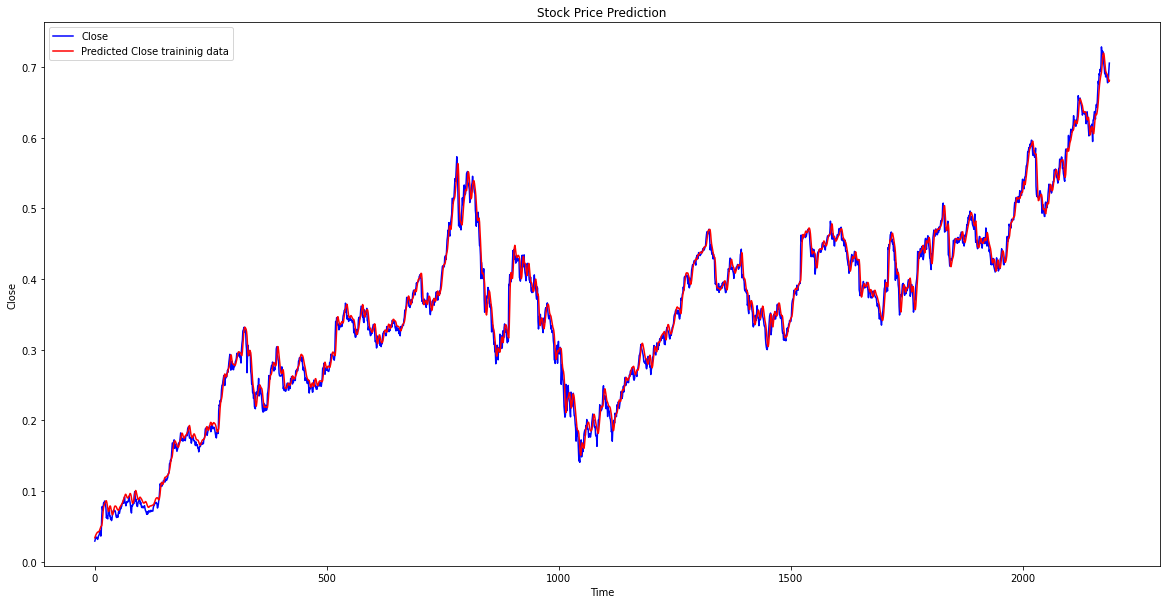

In [60]:
real_close_value_train = normalized_df.iloc[ time_step:int(n*train_per)+time_step , close_value_col_index:close_value_col_index+1].values 



plt.plot(real_close_value_train, color = 'blue', label = 'Close')
plt.plot(predicted_close_value_train,  color = 'red', label = 'Predicted Close traininig data')

   
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()
plt.show()

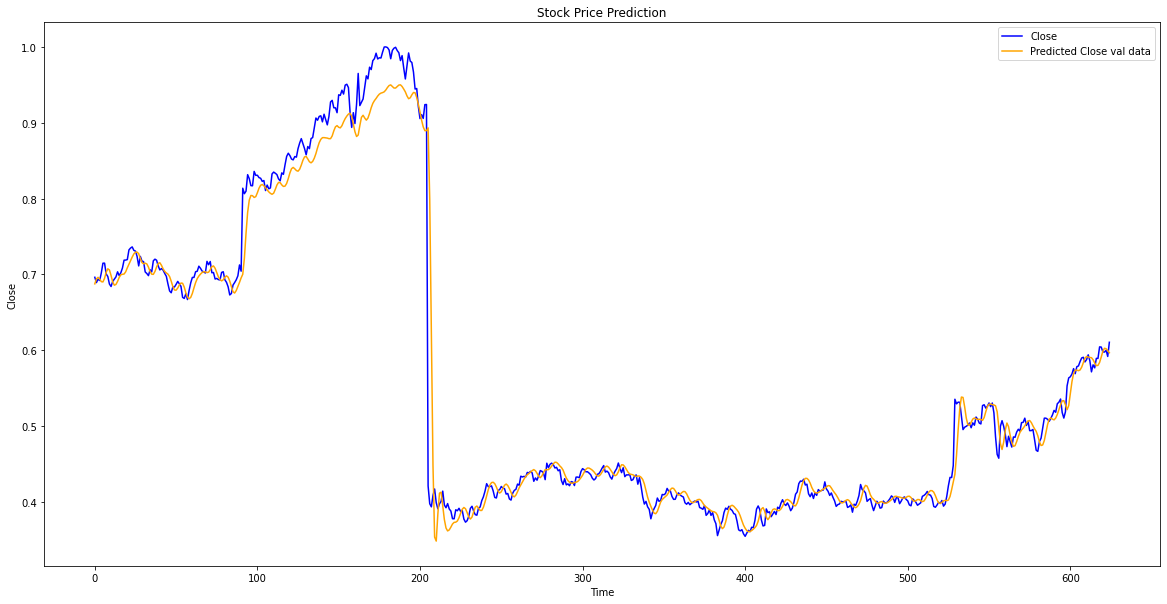

In [61]:
#cross with val_predicted and actual

real_close_value_cross_val = normalized_df.iloc[ int(n*0.7)+time_step:int(n*0.9)+time_step , close_value_col_index:close_value_col_index+1].values 



plt.plot(real_close_value_cross_val, color = 'blue', label = 'Close')
plt.plot(predicted_close_value_val, color = 'orange', label = 'Predicted Close val data')


#int(n*0.7)+time_step
   
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()
plt.show()

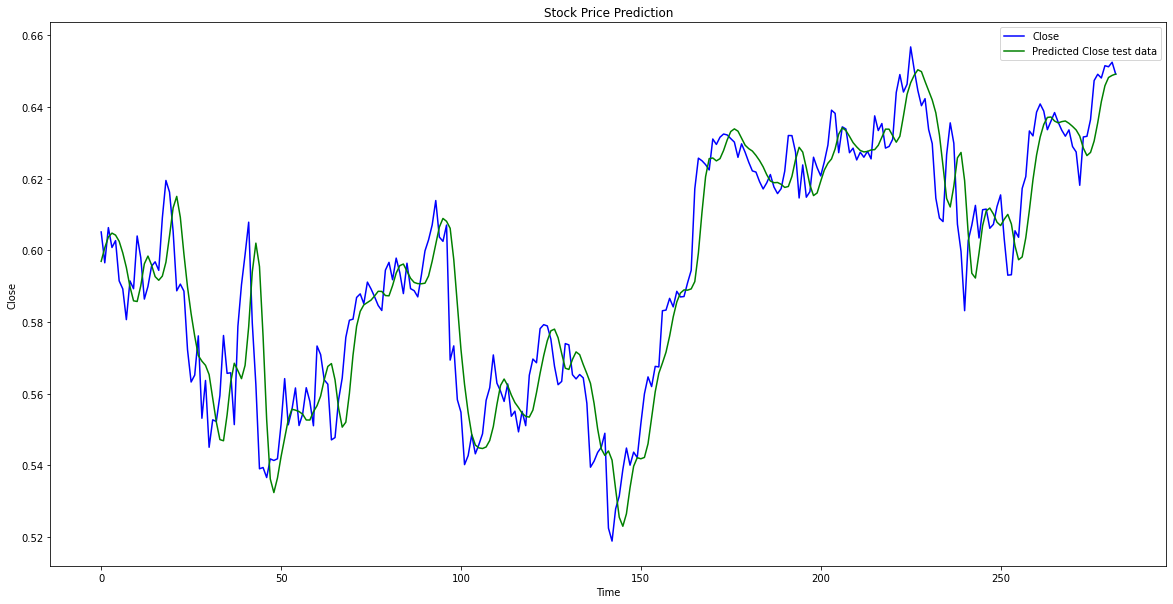

In [62]:
#cross with test_predicted and actual

real_close_value_test = normalized_df.iloc[ int(n*0.9)+time_step: , close_value_col_index:close_value_col_index+1].values

#Plot
plt.plot(real_close_value_test, color = 'blue', label = 'Close')
plt.plot(predicted_close_value_test, color = 'green', label = 'Predicted Close test data')

#int(n*0.7)+time_step
   
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()
plt.show()


#int(n*0.7)+time_step